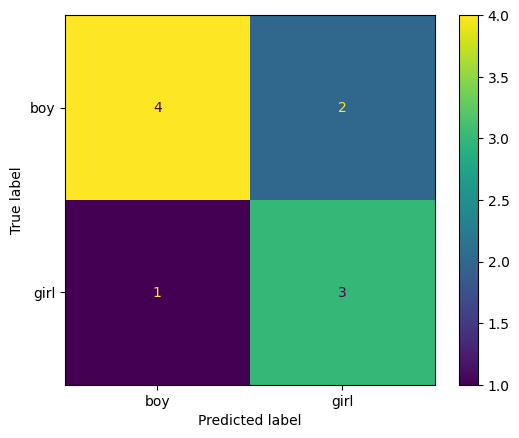

[[4 2]
 [1 3]]
['boy' 'girl']
[0 1 0 1 1 0 0 1 0 0]
[1 1 0 1 0 0 0 1 1 0]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [ ]:
y_actual = ["boy", "girl", "boy", "girl", "girl", "boy", "boy", "girl", "boy", "boy"]
y_predict = ["girl", "girl", "boy", "girl", "boy", "boy", "boy", "girl", "girl", "boy"]
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_actual, y_predict, labels = [ "boy", "girl" ] )
plt.show()
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix( y_actual, y_predict, labels = [ "boy", "girl" ] )
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)
from sklearn import metrics
tn_1, fp_1, fn_1, tp_1 = metrics.confusion_matrix(y_actual, y_predict, labels = [ "boy", "girl" ]).ravel()
from sklearn import preprocessing
lebel_en = preprocessing.LabelEncoder()
lebel_en.fit(y_actual)
print(lebel_en.classes_)
Y_act_encode = lebel_en.transform(y_actual)
Y_pred_encode = lebel_en.transform(y_predict)
print(Y_act_encode)
print(Y_pred_encode)
accuracy_1 = metrics.accuracy_score(Y_act_encode, Y_pred_encode)
precision_1 = metrics.precision_score(Y_act_encode, Y_pred_encode)
recall_1 = metrics.recall_score(Y_act_encode, Y_pred_encode)
f1_score_1 = metrics.f1_score(Y_act_encode, Y_pred_encode)
print(metrics.classification_report(Y_act_encode, Y_pred_encode))
from sklearn.metrics import accuracy_score
accuracy_2 = accuracy_score(Y_act_encode, Y_pred_encode)
from sklearn.metrics import precision_score
precision_2 = precision_score(Y_act_encode, Y_pred_encode)
from sklearn.metrics import recall_score
recall_2 = recall_score(Y_act_encode, Y_pred_encode)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age 

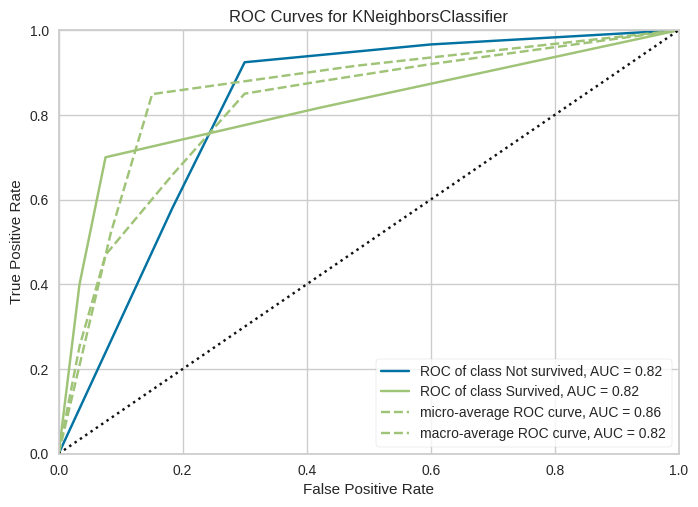

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
import pandas as pd
def data_preparation(data):
 #print missing value
 print(data.isna().sum())
 #fill missing value
 data['Age'].fillna(data['Age'].mode()[0], inplace=True)
 data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
 print(data.isna().sum())
 dummy = pd.get_dummies(data['Sex'])
 data = pd.concat([data, dummy], axis = 'columns')
 data.drop('Sex', axis=1, inplace=True)

 return data
from sklearn.model_selection import train_test_split
data = pd.read_csv('Titanic-Dataset.csv')
new_data = data_preparation(data)
print(new_data)
X = new_data[["Pclass", "Fare", "female"]].values
y = new_data["Survived"].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X)
from sklearn import metrics
print(metrics.classification_report(y_pred, y))
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn_model, classes=["Not survived", "Survived"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
import pandas as pd
def data_preparation(data):
 #print missing value
 #print(data.isna().sum())
 #fill missing value
 data['Age'].fillna(data['Age'].mode()[0], inplace=True)
 data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
 #print(data.isna().sum())
 dummy = pd.get_dummies(data['Sex'])
 data = pd.concat([data, dummy], axis = 'columns')
 data.drop('Sex', axis=1, inplace=True)

 return data
train_ac = []
test_ac = []
for i in range (50, 501, 50):
  from sklearn.model_selection import train_test_split
  data = pd.read_csv('Titanic-Dataset.csv')
  new_data = data_preparation(data)
  #print(new_data)
  X = new_data[["Pclass", "Fare", "female"]].values
  y = new_data["Survived"].values
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_normalized = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state= i)
  from sklearn.neighbors import KNeighborsClassifier
  knn_model= KNeighborsClassifier(n_neighbors=3)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X)
  from sklearn import metrics
  print(i)
  Y_train = knn_model.predict(X_train)
  from sklearn.metrics import accuracy_score
  ac = accuracy_score(y_train, Y_train)
  train_ac.append(ac)
  print(f"Train:{ac}")
  Y_test = knn_model.predict(X_test)
  from sklearn.metrics import accuracy_score
  ac = accuracy_score(y_test, Y_test)
  test_ac.append(ac)
  print(f"Test:{ac}\n")

50
Train:0.8721910112359551
Test:0.8212290502793296

100
Train:0.8623595505617978
Test:0.8156424581005587

150
Train:0.8581460674157303
Test:0.8603351955307262

200
Train:0.8778089887640449
Test:0.7821229050279329

250
Train:0.8637640449438202
Test:0.7821229050279329

300
Train:0.8651685393258427
Test:0.7877094972067039

350
Train:0.8623595505617978
Test:0.8435754189944135

400
Train:0.8665730337078652
Test:0.8547486033519553

450
Train:0.8665730337078652
Test:0.7988826815642458

500
Train:0.8721910112359551
Test:0.7932960893854749



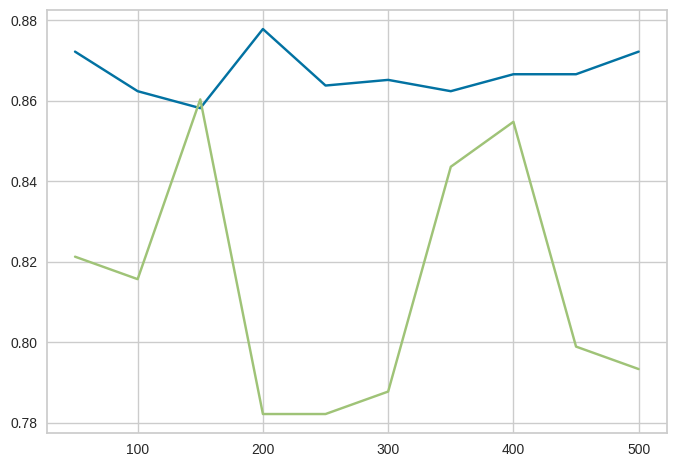

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(50,501,50), train_ac)
plt.plot(range(50,501,50), test_ac)
plt.show()

In [ ]:
import pandas as pd
def data_preparation(data):
 #print missing value
 #print(data.isna().sum())
 #fill missing value
 data['Age'].fillna(data['Age'].mode()[0], inplace=True)
 data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
 #print(data.isna().sum())
 dummy = pd.get_dummies(data['Sex'])
 data = pd.concat([data, dummy], axis = 'columns')
 data.drop('Sex', axis=1, inplace=True)

 return data
train_acc = []
test_acc = []
for i in range (5, 51, 5):
  from sklearn.model_selection import train_test_split
  data = pd.read_csv('Titanic-Dataset.csv')
  new_data = data_preparation(data)
  #print(new_data)
  X = new_data[["Pclass", "Fare", "female"]].values
  y = new_data["Survived"].values
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_normalized = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state= i)
  from sklearn.neighbors import KNeighborsClassifier
  knn_model= KNeighborsClassifier(n_neighbors=3)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X)
  from sklearn import metrics
  print(i)
  Y_train = knn_model.predict(X_train)
  from sklearn.metrics import accuracy_score
  ac = accuracy_score(y_train, Y_train)
  train_acc.append(ac)
  print(f"Train:{ac}")
  Y_test = knn_model.predict(X_test)
  from sklearn.metrics import accuracy_score
  ac = accuracy_score(y_test, Y_test)
  test_acc.append(ac)
  print(f"Test:{ac}\n")

5
Train:0.875
Test:0.8435754189944135

10
Train:0.8679775280898876
Test:0.7877094972067039

15
Train:0.8679775280898876
Test:0.7597765363128491

20
Train:0.875
Test:0.8156424581005587

25
Train:0.8637640449438202
Test:0.8100558659217877

30
Train:0.8792134831460674
Test:0.7430167597765364

35
Train:0.8693820224719101
Test:0.7877094972067039

40
Train:0.8665730337078652
Test:0.8156424581005587

45
Train:0.8539325842696629
Test:0.8324022346368715

50
Train:0.8721910112359551
Test:0.8212290502793296



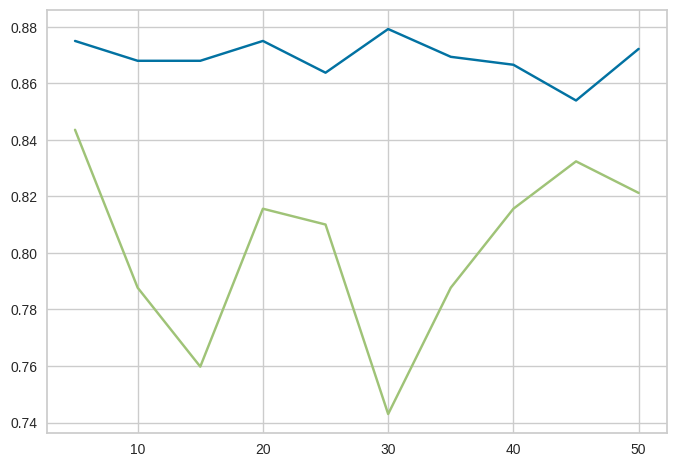

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(5,51,5), train_acc)
plt.plot(range(5,51,5), test_acc)
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# knn = KNeighborsClassifier()
# range_k = range(1,101)
# knn_params = {'n_neighbors': range_k ,'weights': ['uniform', 'distance']}
# print(knn_params)
# grid_model = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
# grid_model.fit(X_train, y_train)
# print('Cross-Validated accuracy : ', grid_model.best_score_*100, '%',
#  ',Best K-value : ', grid_model.best_params_)

{'n_neighbors': range(1, 101), 'weights': ['uniform', 'distance']}
Cross-Validated accuracy :  83.00665101721438 % ,Best K-value :  {'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

def data_preparation(data):
    #print missing value
    #print(data.isna().sum())
    #fill missing value
    data['Age'].fillna(data['Age'].mode()[0], inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    #print(data.isna().sum())
    dummy = pd.get_dummies(data['Sex'])
    data = pd.concat([data, dummy], axis = 'columns')
    data.drop('Sex', axis=1, inplace=True)

    return data

data = pd.read_csv('Titanic-Dataset.csv')
new_data = data_preparation(data)
#print(new_data)
X = new_data[["Pclass", "Fare", "female"]].values
y = new_data["Survived"].values

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=4)

knn = KNeighborsClassifier()

for range_k in range(50, 501,50):

    knn_params = {'n_neighbors': [range_k] ,'weights': ["uniform", "distance"],  'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}
    grid_model = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
    grid_model.fit(X_train, y_train)
    print('Cross-Validated accuracy : ', grid_model.best_score_*100, '%',
    ',Best K-value : ', grid_model.best_params_)

y_pred = grid_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
y_pred_auc= grid_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_auc)
print('AUC: ', auc)
# from yellowbrick.classifier import ROCAUC
# visualizer = ROCAUC(knn_model, classes=["Not survived", "Survived"])
# visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)
# visualizer.show()


Cross-Validated accuracy :  81.30281690140846 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'distance'}
Cross-Validated accuracy :  81.16197183098592 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 100, 'weights': 'distance'}
Cross-Validated accuracy :  81.30281690140843 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 150, 'weights': 'distance'}
Cross-Validated accuracy :  81.44366197183098 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 200, 'weights': 'distance'}
Cross-Validated accuracy :  81.58450704225352 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 250, 'weights': 'distance'}
Cross-Validated accuracy :  81.58450704225352 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 300, 'weights': 'distance'}
Cross-Validated accuracy :  81.44366197183099 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 350, 'weights': 'distance'}
Cross-Validated accuracy :  81.72535211267606 % ,Best K-